<a href="https://colab.research.google.com/github/msudhanshu10/Data-Science/blob/master/DrugPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Installing libraries



In [ ]:
! pip install chembl_webresource_client

     |████████████████████████████████| 61kB 4.5MB/s 
  Created wheel for chembl-webresource-client: filename=chembl_webresource_client-0.10.2-cp36-none-any.whl size=55663 sha256=040f7e6828ac6479da9310ce70b3e056abfe0eb46075b82f076d80de89673db0
  Stored in directory: /root/.cache/pip/wheels/e6/96/19/3f042bfda7c669bfe24c8278477f57b0fbbf3e488b4c09e3a8
Successfully built chembl-webresource-client


In [ ]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

# 2. Search for the targetted protein

In [ ]:
# target search for coronavirus
target= new_client.target
print(type(target))

target_query= target.search('coronavirus')
print(type(target_query))
targets= pd.DataFrame.from_dict(target_query)

print(type(targets))

<class 'chembl_webresource_client.query_set.QuerySet'>
<class 'chembl_webresource_client.query_set.QuerySet'>
<class 'pandas.core.frame.DataFrame'>


In [ ]:
targets.head()

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Coronavirus,Coronavirus,17.0,False,CHEMBL613732,[],ORGANISM,11119
1,[],SARS coronavirus,SARS coronavirus,14.0,False,CHEMBL612575,[],ORGANISM,227859
2,[],Feline coronavirus,Feline coronavirus,14.0,False,CHEMBL612744,[],ORGANISM,12663
3,[],Human coronavirus 229E,Human coronavirus 229E,13.0,False,CHEMBL613837,[],ORGANISM,11137
4,"[{'xref_id': 'P0C6U8', 'xref_name': None, 'xre...",SARS coronavirus,SARS coronavirus 3C-like proteinase,10.0,False,CHEMBL3927,"[{'accession': 'P0C6U8', 'component_descriptio...",SINGLE PROTEIN,227859


In [ ]:
targets.shape

(7, 9)

In [ ]:
targets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cross_references    7 non-null      object 
 1   organism            7 non-null      object 
 2   pref_name           7 non-null      object 
 3   score               7 non-null      float64
 4   species_group_flag  7 non-null      bool   
 5   target_chembl_id    7 non-null      object 
 6   target_components   7 non-null      object 
 7   target_type         7 non-null      object 
 8   tax_id              7 non-null      int64  
dtypes: bool(1), float64(1), int64(1), object(6)
memory usage: 583.0+ bytes


In [ ]:
targets.dtypes

cross_references       object
organism               object
pref_name              object
score                 float64
species_group_flag       bool
target_chembl_id       object
target_components      object
target_type            object
tax_id                  int64
dtype: object

In [ ]:
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Coronavirus,Coronavirus,17.0,False,CHEMBL613732,[],ORGANISM,11119
1,[],SARS coronavirus,SARS coronavirus,14.0,False,CHEMBL612575,[],ORGANISM,227859
2,[],Feline coronavirus,Feline coronavirus,14.0,False,CHEMBL612744,[],ORGANISM,12663
3,[],Human coronavirus 229E,Human coronavirus 229E,13.0,False,CHEMBL613837,[],ORGANISM,11137
4,"[{'xref_id': 'P0C6U8', 'xref_name': None, 'xre...",SARS coronavirus,SARS coronavirus 3C-like proteinase,10.0,False,CHEMBL3927,"[{'accession': 'P0C6U8', 'component_descriptio...",SINGLE PROTEIN,227859
5,[],Middle East respiratory syndrome-related coron...,Middle East respiratory syndrome-related coron...,9.0,False,CHEMBL4296578,[],ORGANISM,1335626
6,"[{'xref_id': 'P0C6X7', 'xref_name': None, 'xre...",SARS coronavirus,Replicase polyprotein 1ab,5.0,False,CHEMBL5118,"[{'accession': 'P0C6X7', 'component_descriptio...",SINGLE PROTEIN,227859


# 3. Select and retrieve bioactivity data for SARS coronavirus 3C-like proteinease (5th entry)

In [ ]:
selected_target= targets.target_chembl_id[4] #target_chembl_id is the unique id for each organism
selected_target

'CHEMBL3927'

Here, we will retrieve only bioactivity data for coronavirus 3C-like proteinease.


In [ ]:
activity= new_client.activity
res= activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [ ]:
print(type(activity))
print(type(res))

<class 'chembl_webresource_client.query_set.QuerySet'>
<class 'chembl_webresource_client.query_set.QuerySet'>


In [ ]:
df=pd.DataFrame.from_dict(res)

In [ ]:
df.head()

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,BAO_0000190,BAO_0000357,single protein format,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,None,None,CHEMBL1139624,Bioorg. Med. Chem. Lett.,2005,"{'bei': '18.28', 'le': '0.33', 'lle': '3.25', ...",CHEMBL187579,None,CHEMBL187579,5.14,False,http://www.openphacts.org/units/Nanomolar,384103,=,1,True,=,None,IC50,nM,None,7200.0,CHEMBL3927,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,7.2
1,None,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,BAO_0000190,BAO_0000357,single protein format,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,None,None,CHEMBL1139624,Bioorg. Med. Chem. Lett.,2005,"{'bei': '12.10', 'le': '0.33', 'lle': '1.22', ...",CHEMBL188487,None,CHEMBL188487,5.03,False,http://www.openphacts.org/units/Nanomolar,383984,=,1,True,=,None,IC50,nM,None,9400.0,CHEMBL3927,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,9.4
2,None,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,BAO_0000190,BAO_0000357,single protein format,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,None,None,CHEMBL1139624,Bioorg. Med. Chem. Lett.,2005,"{'bei': '11.56', 'le': '0.29', 'lle': '2.21', ...",CHEMBL185698,None,CHEMBL185698,4.87,False,http://www.openphacts.org/units/Nanomolar,384106,=,1,True,=,None,IC50,nM,None,13500.0,CHEMBL3927,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.5
3,None,1481065,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,BAO_0000190,BAO_0000357,single protein format,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,None,None,CHEMBL1139624,Bioorg. Med. Chem. Lett.,2005,"{'bei': '16.64', 'le': '0.32', 'lle': '1.25', ...",CHEMBL426082,None,CHEMBL426082,4.88,False,http://www.openphacts.org/units/Nanomolar,384075,=,1,True,=,None,IC50,nM,None,13110.0,CHEMBL3927,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.11
4,None,1481066,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,BAO_0000190,BAO_0000357,single protein format,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],None,None,CHEMBL1139624,Bioorg. Med. Chem. Lett.,2005,"{'bei': '16.84', 'le': '0.32', 'lle': '2.16', ...",CHEMBL187717,None,CHEMBL187717,5.70,False,http://www.openphacts.org/units/Nanomolar,384234,=,1,True,=,None,IC50,nM,None,2000.0,CHEMBL3927,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,2.0


In [ ]:
df.standard_type.unique()

array(['IC50'], dtype=object)

In [ ]:
 # Standard Value is the potency of the drug. Lower the value, the better the potency of the drug.

In [ ]:
# To inhibit 50% conc of the protein, you need standard value of the drug

Finally, write the dataframe to a csv file.

In [ ]:
df.to_csv('bioactivity_data.csv', index=False)
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
!cp bioactivity_data.csv "drive/My Drive/"

In [ ]:
!ls

bioactivity_data.csv  drive  sample_data


In [ ]:
! cp bioactivity_data.csv "/data"

In [ ]:
!ls "/data"

/data


In [ ]:
! head bioactivity_data.csv

activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS coronavirus main protease (SARS CoV 3C-like protease),B,BAO_0000190,BAO_0000357,single protein format,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,,,CHEMBL1139624,Bioorg. Med. Chem. Lett.,2005,"{'bei': '18.28', 'le': '0.33', 'lle': '3.25', 'sei': '5.90'}",CHEMBL187579,,CHEMBL187579,5.14,False,http://ww

In [ ]:
df.head()

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,BAO_0000190,BAO_0000357,single protein format,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,None,None,CHEMBL1139624,Bioorg. Med. Chem. Lett.,2005,"{'bei': '18.28', 'le': '0.33', 'lle': '3.25', ...",CHEMBL187579,None,CHEMBL187579,5.14,False,http://www.openphacts.org/units/Nanomolar,384103,=,1,True,=,None,IC50,nM,None,7200.0,CHEMBL3927,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,7.2
1,None,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,BAO_0000190,BAO_0000357,single protein format,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,None,None,CHEMBL1139624,Bioorg. Med. Chem. Lett.,2005,"{'bei': '12.10', 'le': '0.33', 'lle': '1.22', ...",CHEMBL188487,None,CHEMBL188487,5.03,False,http://www.openphacts.org/units/Nanomolar,383984,=,1,True,=,None,IC50,nM,None,9400.0,CHEMBL3927,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,9.4
2,None,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,BAO_0000190,BAO_0000357,single protein format,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,None,None,CHEMBL1139624,Bioorg. Med. Chem. Lett.,2005,"{'bei': '11.56', 'le': '0.29', 'lle': '2.21', ...",CHEMBL185698,None,CHEMBL185698,4.87,False,http://www.openphacts.org/units/Nanomolar,384106,=,1,True,=,None,IC50,nM,None,13500.0,CHEMBL3927,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.5
3,None,1481065,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,BAO_0000190,BAO_0000357,single protein format,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,None,None,CHEMBL1139624,Bioorg. Med. Chem. Lett.,2005,"{'bei': '16.64', 'le': '0.32', 'lle': '1.25', ...",CHEMBL426082,None,CHEMBL426082,4.88,False,http://www.openphacts.org/units/Nanomolar,384075,=,1,True,=,None,IC50,nM,None,13110.0,CHEMBL3927,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.11
4,None,1481066,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,BAO_0000190,BAO_0000357,single protein format,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],None,None,CHEMBL1139624,Bioorg. Med. Chem. Lett.,2005,"{'bei': '16.84', 'le': '0.32', 'lle': '2.16', ...",CHEMBL187717,None,CHEMBL187717,5.70,False,http://www.openphacts.org/units/Nanomolar,384234,=,1,True,=,None,IC50,nM,None,2000.0,CHEMBL3927,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,2.0


In [ ]:
df.shape

(133, 43)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 43 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   activity_comment           0 non-null      object
 1   activity_id                133 non-null    int64 
 2   activity_properties        133 non-null    object
 3   assay_chembl_id            133 non-null    object
 4   assay_description          133 non-null    object
 5   assay_type                 133 non-null    object
 6   bao_endpoint               133 non-null    object
 7   bao_format                 133 non-null    object
 8   bao_label                  133 non-null    object
 9   canonical_smiles           133 non-null    object
 10  data_validity_comment      42 non-null     object
 11  data_validity_description  42 non-null     object
 12  document_chembl_id         133 non-null    object
 13  document_journal           133 non-null    object
 14  document_y

In [ ]:
df.dtypes

activity_comment             object
activity_id                   int64
activity_properties          object
assay_chembl_id              object
assay_description            object
assay_type                   object
bao_endpoint                 object
bao_format                   object
bao_label                    object
canonical_smiles             object
data_validity_comment        object
data_validity_description    object
document_chembl_id           object
document_journal             object
document_year                 int64
ligand_efficiency            object
molecule_chembl_id           object
molecule_pref_name           object
parent_molecule_chembl_id    object
pchembl_value                object
potential_duplicate            bool
qudt_units                   object
record_id                     int64
relation                     object
src_id                        int64
standard_flag                  bool
standard_relation            object
standard_text_value         

# 4. Handling missing data

In [ ]:
df['standard_value'].isna().sum()

0

No missing data :)

# Data Preprocessing

Drug having IC50 value > 10000 is 'Inactive'; <1000, 'active' ; else intermediate

In [ ]:
bioactivity_class= list()

In [ ]:
for i in df['standard_value']:
  if float(i) >=10000:
    bioactivity_class.append('inactive')
  elif float(i) <=1000:
    bioactivity_class.append('active')
  else:
    bioactivity_class.append('intermediate')

This data set comprises of many compounds. A compound is a molecule/drug that produces some effect on the target protein.
Each compound has chembl mol id.

In [ ]:
df['molecule_chembl_id'].shape

(133,)

In [ ]:
df['molecule_chembl_id'].nunique()

86

Therfore, we need to remove the redundancy.

In [ ]:
mol_cid=list()
for i in df['molecule_chembl_id']:
  mol_cid.append(i)

In [ ]:
mol_cid.count

<function list.count>

Similarly, do for other variables.

In [ ]:
canonical_smiles =[]
for i in df.canonical_smiles:
  canonical_smiles.append(i)

In [ ]:
standard_value=[]
for i in df['standard_value']:
  standard_value.append(i)

In [ ]:
df2=pd.DataFrame({'molecule_chembl_id':mol_cid, 'canonical_smiles':canonical_smiles, 'standard_value':standard_value,'bioactivity_class':bioactivity_class})
df2.head()

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,intermediate
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,intermediate
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,inactive
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,inactive
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,intermediate


Save Data Frame to CSV file

In [ ]:
df2.to_csv('bioactivity_preprocessed_data.csv', index=False)

In [ ]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
!cp bioactivity_preprocessed_data.csv "drive/My Drive/"

In [ ]:
!ls

bioactivity_data.csv  bioactivity_preprocessed_data.csv  drive	sample_data


# Install conda and rdkit

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2020-12-28 16:42:27--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   234MB/s    in 0.3s    

2020-12-28 16:42:27 (234 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h

# Calculate Lipinski descriptors
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the druglikeness of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the Rule-of-Five or Lipinski's Rule.

The Lipinski's Rule stated the following:

Molecular weight < 500 Dalton

Octanol-water partition coefficient (LogP) < 5

Hydrogen bond donors < 5

Hydrogen bond acceptors < 10

## Importing Libraries

In [ ]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

# Calculate Moloecular descriptors

In [ ]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= [] # list
    for elem in smiles: # element in smile list. Each element will correspond to a molecule.
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)
    print(moldata)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   # arrange the four lipinski values in an array
    
        if(i==0):
            baseData=row # First row addition
        else:
            baseData=np.vstack([baseData, row]) # creation of a stack
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames) # data frame containing Lipinski's values
    
    return descriptors

In [ ]:
df_lipinski= lipinski(df2['canonical_smiles'])

[<rdkit.Chem.rdchem.Mol object at 0x7f9e7a846670>, <rdkit.Chem.rdchem.Mol object at 0x7f9e7a846620>, <rdkit.Chem.rdchem.Mol object at 0x7f9e7a8465d0>, <rdkit.Chem.rdchem.Mol object at 0x7f9e7a8468f0>, <rdkit.Chem.rdchem.Mol object at 0x7f9e7a846440>, <rdkit.Chem.rdchem.Mol object at 0x7f9e7a846490>, <rdkit.Chem.rdchem.Mol object at 0x7f9e7a8467b0>, <rdkit.Chem.rdchem.Mol object at 0x7f9e7a8463a0>, <rdkit.Chem.rdchem.Mol object at 0x7f9e7a846300>, <rdkit.Chem.rdchem.Mol object at 0x7f9e7a846260>, <rdkit.Chem.rdchem.Mol object at 0x7f9e7a846210>, <rdkit.Chem.rdchem.Mol object at 0x7f9e7a8461c0>, <rdkit.Chem.rdchem.Mol object at 0x7f9e7a846120>, <rdkit.Chem.rdchem.Mol object at 0x7f9e7a846990>, <rdkit.Chem.rdchem.Mol object at 0x7f9e7a846a30>, <rdkit.Chem.rdchem.Mol object at 0x7f9e7a846850>, <rdkit.Chem.rdchem.Mol object at 0x7f9e7a8464e0>, <rdkit.Chem.rdchem.Mol object at 0x7f9e7a84a030>, <rdkit.Chem.rdchem.Mol object at 0x7f9e7a84a080>, <rdkit.Chem.rdchem.Mol object at 0x7f9e7a84a0d0>,

In [ ]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,281.271,1.89262,0.0,5.0
1,415.589,3.81320,0.0,2.0
2,421.190,2.66050,0.0,4.0
3,293.347,3.63080,0.0,3.0
4,338.344,3.53900,0.0,5.0
...,...,...,...,...
128,338.359,3.40102,0.0,5.0
129,296.366,3.44330,0.0,3.0
130,276.291,4.09564,0.0,3.0
131,278.307,3.29102,0.0,3.0


MW= Size of the molecule

LopP= Solubility

NumHAcceptors= relative no of Hydrogen Bond acceptors

NumHDonors= relative no of Hydrogen Bond donors

In [ ]:
df2

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,intermediate
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,intermediate
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,inactive
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,inactive
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,intermediate
...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,10600.0,inactive
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,10100.0,inactive
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,11500.0,inactive
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,10700.0,inactive


In [ ]:
df_combined= pd.concat([df2, df_lipinski], axis=1)

In [ ]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,intermediate,281.271,1.89262,0.0,5.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,intermediate,415.589,3.81320,0.0,2.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,inactive,421.190,2.66050,0.0,4.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,inactive,293.347,3.63080,0.0,3.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,intermediate,338.344,3.53900,0.0,5.0
...,...,...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,10600.0,inactive,338.359,3.40102,0.0,5.0
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,10100.0,inactive,296.366,3.44330,0.0,3.0
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,11500.0,inactive,276.291,4.09564,0.0,3.0
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,10700.0,inactive,278.307,3.29102,0.0,3.0


# Convert IC50 values to pIC50.

Original values of IC50 are non-uniformaly distributed. So, to have a unifrom distribution, we need to convert IC50 to pIC50 (=-log IC50).

This custom function pIC50() will accept a DataFrame as input and will:

Take the IC50 values from the standard_value column and converts it from nM to 
M by multiplying the value by 10 −9 

Take the molar value and apply -log10

Delete the standard_value column and create a new pIC50 column

In [ ]:
pIC50=[]

def convertion (input_df):
  for ic50 in input_df['standard_value_norm']:
    pIC50.append(-np.log10(ic50*(10**-9)))

  input_df['pIC50']= pIC50
  x= input_df.drop('standard_value_norm', axis=1)

  return x



In [ ]:
df_combined.describe()

,MW,LogP,NumHDonors,NumHAcceptors
count,133.000000,133.000000,133.000000,133.000000
mean,376.392692,3.908219,0.909774,5.248120
std,87.221623,1.385540,0.882993,2.072204
min,204.185000,-0.055400,0.000000,2.000000
25%,296.366000,3.220320,0.000000,3.000000
50%,369.515000,3.769900,1.000000,5.000000
75%,437.437000,4.667120,2.000000,6.000000
max,588.635000,7.051540,3.000000,12.000000


In [ ]:
-np.log10(10*(10**-9)*1000000000)

-1.0

In [ ]:
-np.log10(10*(10**-9)*10000000)

1.0

In [ ]:
def norm_values(input_df):
  norm=[]
  for stnd_val in input_df['standard_value']:
    if float(stnd_val)>=100000000:
      stnd_val=100000000
    norm.append(float(stnd_val))

  input_df['standard_value_norm']= norm
  return input_df.drop('standard_value', axis=1)

In [ ]:
df_combined.dtypes

molecule_chembl_id     object
canonical_smiles       object
standard_value         object
bioactivity_class      object
MW                    float64
LogP                  float64
NumHDonors            float64
NumHAcceptors         float64
dtype: object

In [ ]:
df_norm= norm_values(df_combined)
df_norm.head()

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,281.271,1.89262,0.0,5.0,7200.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,415.589,3.81320,0.0,2.0,9400.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0.0,4.0,13500.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0.0,3.0,13110.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,338.344,3.53900,0.0,5.0,2000.0


In [ ]:
df_norm.describe()

,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
count,133.000000,133.000000,133.000000,133.000000,1.330000e+02
mean,376.392692,3.908219,0.909774,5.248120,2.110164e+07
std,87.221623,1.385540,0.882993,2.072204,4.089714e+07
min,204.185000,-0.055400,0.000000,2.000000,5.000000e+01
25%,296.366000,3.220320,0.000000,3.000000,1.070000e+04
50%,369.515000,3.769900,1.000000,5.000000,2.350000e+04
75%,437.437000,4.667120,2.000000,6.000000,3.000000e+05
max,588.635000,7.051540,3.000000,12.000000,1.000000e+08


In [ ]:
df_final= convertion(df_norm)
df_final.head()

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,281.271,1.89262,0.0,5.0,5.142668
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,415.589,3.81320,0.0,2.0,5.026872
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0.0,4.0,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0.0,3.0,4.882397
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,338.344,3.53900,0.0,5.0,5.698970


# Removing the intermediate class

In [ ]:
df_2class= df_final[df_final['bioactivity_class']!= 'intermediate']
df_2class.head()

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.6605,0.0,4.0,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.6308,0.0,3.0,4.882397
5,CHEMBL365134,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c(Br)cccc21,active,372.243,4.3933,0.0,3.0,6.008774
7,CHEMBL190743,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(I)cc21,active,419.243,4.2354,0.0,3.0,6.022276
8,CHEMBL365469,O=C1C(=O)N(Cc2cc3ccccc3s2)c2cccc(Cl)c21,inactive,327.792,4.2842,0.0,3.0,4.950782


In [ ]:
df_2class.shape

(119, 8)

# Exploratory Data Analysis (Chemical space analysis) via Lipinski Descriptors

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<Figure size 432x432 with 0 Axes>

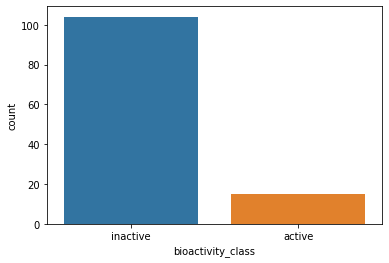

<Figure size 432x432 with 0 Axes>

In [ ]:
sns.countplot(x=df_2class['bioactivity_class'], data=df_2class)
plt.figure(figsize=(6,6))

# Scatter plot of MW vs solubility

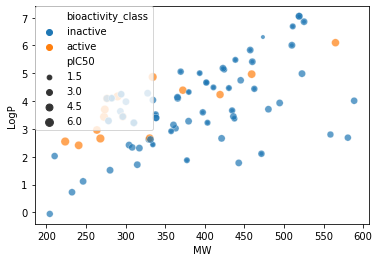

In [ ]:
sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', alpha=0.7)
plt.legend(loc='upper left', borderaxespad=0)

<Figure size 1080x720 with 0 Axes>

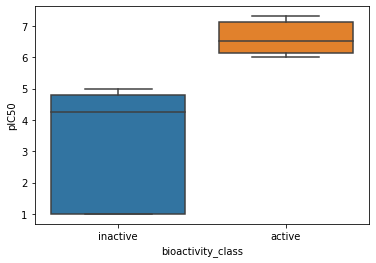

<Figure size 1080x720 with 0 Axes>

In [ ]:
sns.boxplot(x='bioactivity_class', y='pIC50', data=df_2class)
plt.figure(figsize=(15, 10))
# distribution of inactive is vast.
# pIC50 >5 will be termed as active ow inactive

# Statistical Analysis | Mann-Whitney U test

In [ ]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class'] 
  df = df_2class[selection] # df data frame will contain columns of descriptor and bioactivity_class only
  active = df[df.bioactivity_class == 'active'] #data frame containing only active compounds
  active = active[descriptor] # data frame containing only input column with active compounds

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor] #data frame containing only input column with inactive compunds

# compare samples
  stat, p = mannwhitneyu(active, inactive) # directly perform mannwhitney u test on the sample data
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.0,1.662636e-10,0.05,Different distribution (reject H0)


# MW

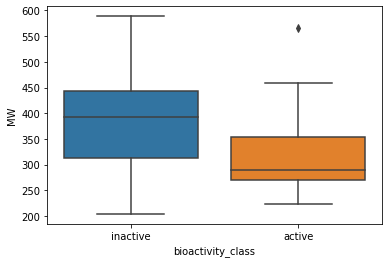

In [ ]:
sns.boxplot(x='bioactivity_class', y='MW', data=df_2class)

In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,409.5,0.001525,0.05,Different distribution (reject H0)


# LopP

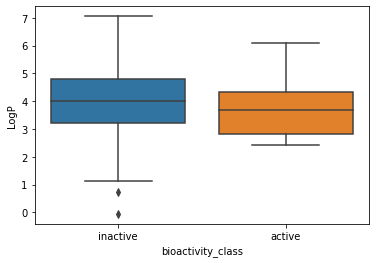

In [ ]:
sns.boxplot(x='bioactivity_class', y='LogP', data=df_2class)

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,712.5,0.295805,0.05,Same distribution (fail to reject H0)


# NumHDonors

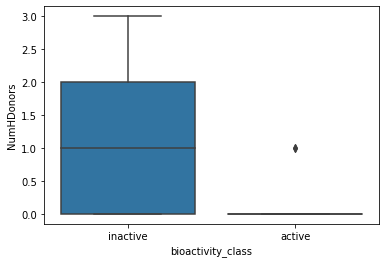

In [ ]:
sns.boxplot(x='bioactivity_class', y='NumHDonors', data=df_2class)

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,299.5,0.000024,0.05,Different distribution (reject H0)


# NumHAcceptors

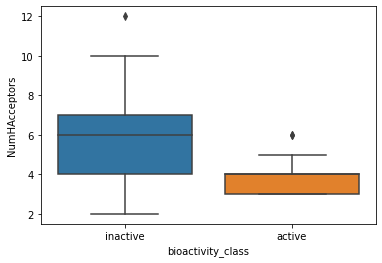

In [ ]:
sns.boxplot(x='bioactivity_class', y='NumHAcceptors', data=df_2class)

In [ ]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,415.0,0.001557,0.05,Different distribution (reject H0)


# Interpretation of the statistical analysis

### Lipinski Descriptors
Of the 4 decriptors, only LogP has same distribution for active and inactive class of molecules and other three descriptors have different distribution for the active and the inactive class.

### pIC50
if pIC50 > 5 (IC50 < 1000 nM) then, it will be an active drug molecule else inactive 

# Download paDEL Descriptors

In [ ]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2020-12-28 16:55:58--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2020-12-28 16:55:58--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M  86.7MB/s    in 0.3s    

2020-12-28 16:55:59 (86.7 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2020-12-28 16:55:59--  https://github

In [ ]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

Padel will be used to calculate molecular descriptors.
# Load Bioactivity data

In [ ]:
! wget https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv

--2020-12-28 13:53:56--  https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 655414 (640K) [text/plain]
Saving to: ‘acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv’

acetylcholinesteras 100%[===================>] 640.05K  --.-KB/s    in 0.05s   

2020-12-28 13:53:57 (11.6 MB/s) - ‘acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv’ saved [655414/655414]



In [ ]:
import pandas as pd

In [ ]:
df3= pd.read_csv('acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv')

In [ ]:
df_2class.head()

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.6605,0.0,4.0,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.6308,0.0,3.0,4.882397
5,CHEMBL365134,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c(Br)cccc21,active,372.243,4.3933,0.0,3.0,6.008774
7,CHEMBL190743,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(I)cc21,active,419.243,4.2354,0.0,3.0,6.022276
8,CHEMBL365469,O=C1C(=O)N(Cc2cc3ccccc3s2)c2cccc(Cl)c21,inactive,327.792,4.2842,0.0,3.0,4.950782


In [ ]:
df3.head()

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0.0,6.0,6.124939
1,1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.5546,0.0,5.0,7.000000
2,2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.3574,0.0,5.0,4.301030
3,3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.7069,0.0,5.0,6.522879
4,4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.0953,0.0,6.0,6.096910
